# Ch 03-03

## 결정 트리

- 결정 트리 : 루트 노드로부터 리프 노드에 샘플이 하나씩만 남을 때까지 질문을 학습(트리 성장).

- 순수 노드 : 어떤 노드에 한 종류의 클래스만 존재함

- 모든 리프 노드가 순수 노드가 될 때까지 성장할 경우, 예측 정확도는 높아지지만 과대적합 문제 발생 가능 -> 가지치기(규제)

### 정보 이득 최대화

IG = Ip - nl/np\*Il - nr/np\*Ir

- IG : 불순도
- Ip : 부모 노드의 불순도
- Il : 왼쪽 자식 노드의 불순도
- Ir : 오른쪽 자식 노드의 불순도

불순도를 최소화 시키는 방향으로 학습

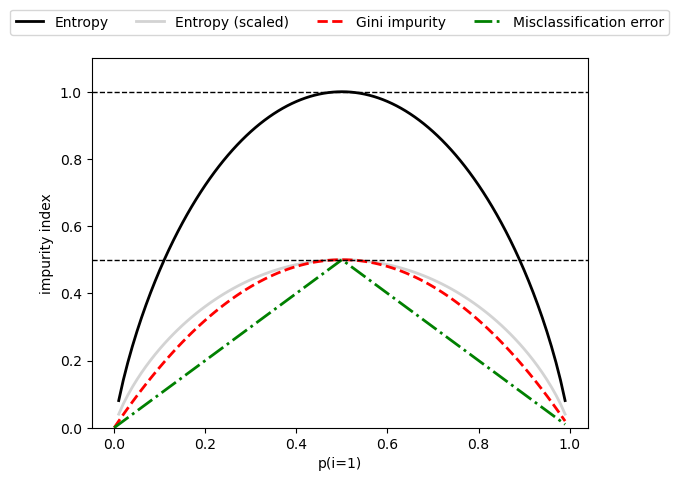

In [33]:
import matplotlib.pyplot as plt
import numpy as np


def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini impurity', 'Misclassification error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')

plt.show()

- 불순도가 높다 == 데이터에 결정을 내릴만한 충분한 정보가 없다
- Entropy 불순도 : 확률분포가 가지는 정보의 확신도. 의사결정 트리에서는 엔트로피가 0일 때 분리를 멈춤
- Gini 불순도 : 지니 계수가 0에 가까울수록 평등함(불순도가 낮음)
- Misclassification error : 분류오차

### 결정 트리 만들기

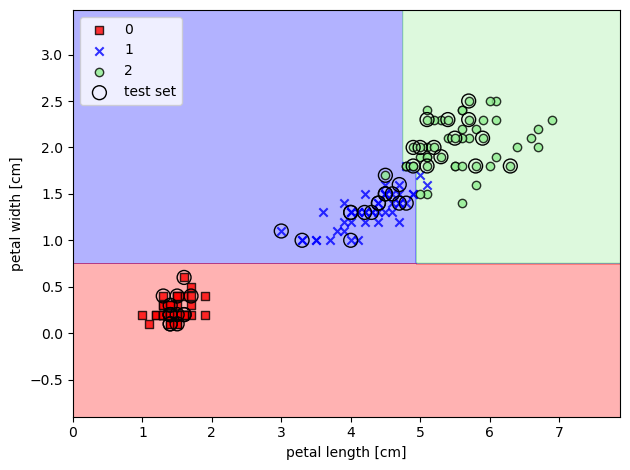

In [34]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', # 지니 계수 사용
                                    max_depth=4, # root 아래 최대 층수
                                    random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model,
                      test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

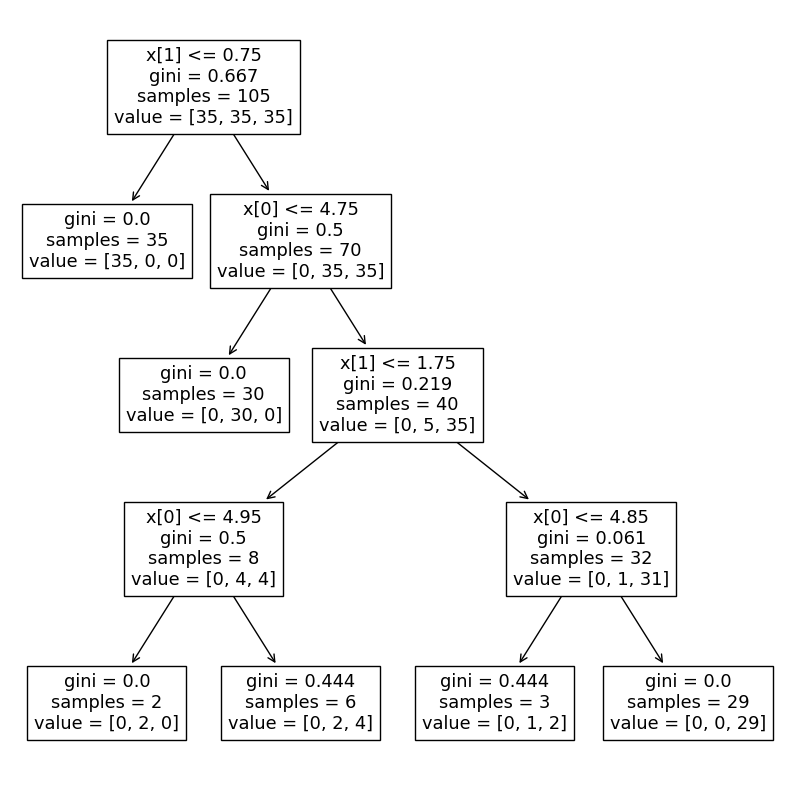

In [35]:
from sklearn import tree

plt.figure(figsize=(10,10))
tree.plot_tree(tree_model) # tree 시각화
plt.show()

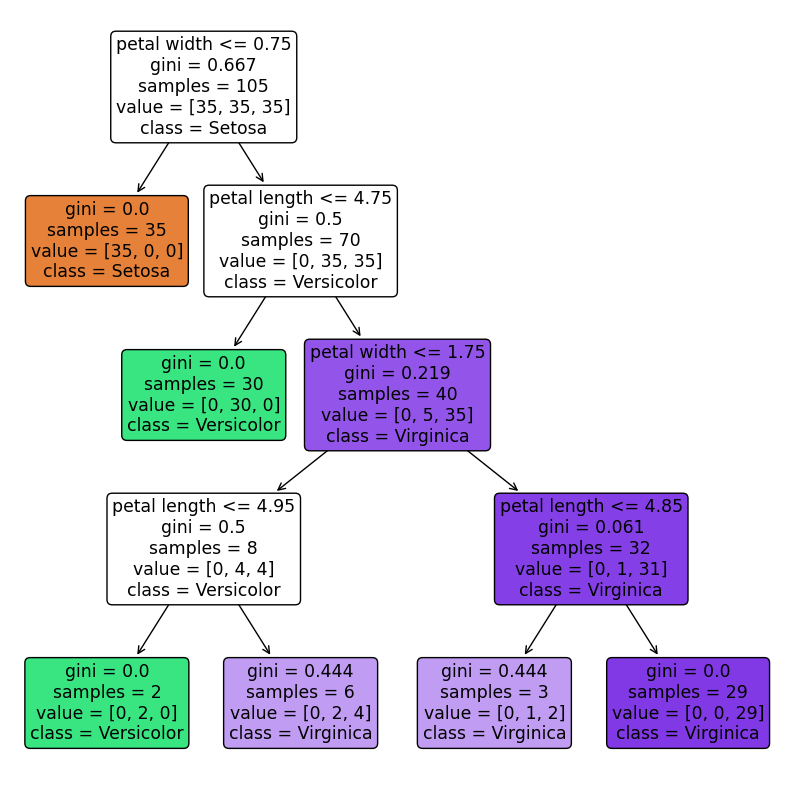

In [36]:
plt.figure(figsize=(10,10))
tree.plot_tree(tree_model,
               impurity=True,  # gini 계수 출력
               filled=True,  # 순수 노드 컬러링
               rounded=True, 
               class_names=['Setosa', 
                            'Versicolor',
                            'Virginica'],
               feature_names=['petal length', 
                              'petal width'])
plt.show()

### 랜덤 포레스트로 여러 개의 결정 트리 연결

여러 개의 결정 트리 -> 여러 개의 예측 결과 값을 사용하여 다수로 나온 결과값을 사용

부트스트랩 샘플링; 랜덤 샘플링
-> 결정 트리 하나로는 성능이 매우 떨어짐, 과대적합 가능성
-> 성능이 낮은 결정 트리 여러 개 (랜덤 포레스트)를 사용하여 성능 증대

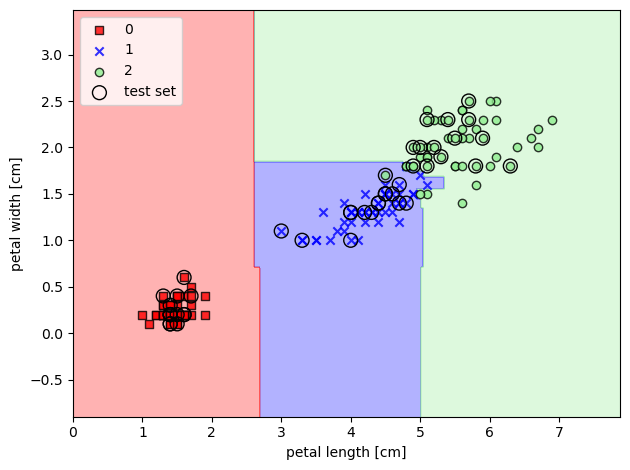

In [37]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

### K-최근접 이웃 : 게으른 학습 알고리즘

어떤 범위를 잡아, 그 범위 내 가장 많이 존재하는 클래스로 예측을 결정

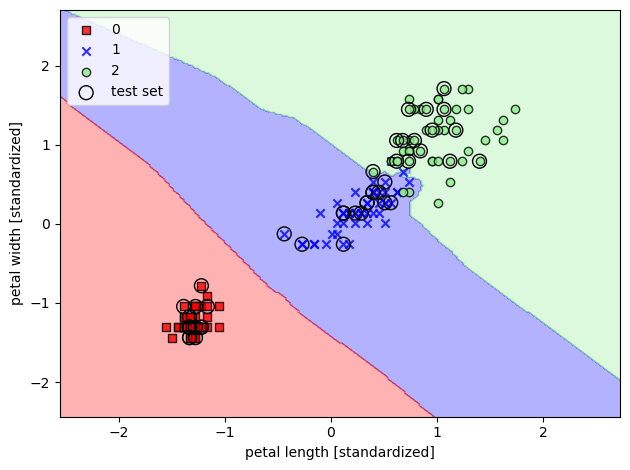

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,  # 예측치의 허용 이웃 수
                           p=2,  # p=2 : 유클리드 거리로 계산
                           metric='minkowski')

knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()